<a href="https://colab.research.google.com/github/taskswithcode/MLIntro/blob/main/notebooks/WhatDoesGradientCapture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


- This is the notebook for the video [What does a Gradient capture? ](https://youtube.com/shorts/mPVBgwBjbTQ?si=KhPvKNZtxxdhnPSs) [ ![Watch](https://raw.githubusercontent.com/taskswithcode/image_assets/main/.github/images/Watch.svg)](https://youtube.com/shorts/mPVBgwBjbTQ?si=KhPvKNZtxxdhnPSs)

Let's say we want to algorithmically nudge the red point on the curve below towards the valley  *(the lowest point on the curve)* . ***Gradient captures the direction of the steepest descent at a point.*** We can use the gradient computed at that point, to nudge that point down the curve. This idea is utilized in training neural networks.


#### The basic intuition for what Gradient is...

The image below is a plot of a function of a single variable X

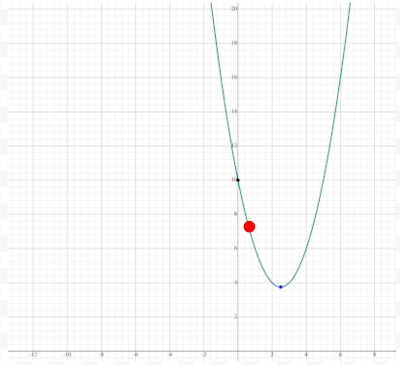

Lets first define the function shown in the plot above. It is a function of a single variable

In [ ]:
def function(x):
  return x**2 - 5*x + 10


The red point A on the curve above is on the left side of the valley. The valley is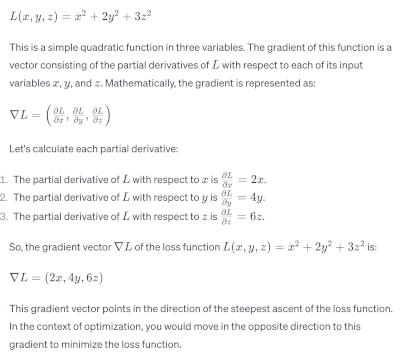 the lowest point of the function plot.

In [ ]:
X = .5
print("Point A = ",X,function(X))

Point A =  0.5 7.75


Now lets define the function to compute the gradient at any point x.
Gradient computation can be broken down to the following steps
- evaluate the function at point x
- increment the x coordinate of a point by a small amount h
- evaluate the function response after this increment - f(x+h)
- calculate the rate of change of the function response - (f(x+h) - f(x))/ h
- this value is the gradient of the function at the point.
  - This number tells **by what factor** the function output changed for a unit tweak of the variable x.
  - The gradient also **captures the direction of change in its sign**, that is, did the function output increase or decrease

In [ ]:
def compute_gradient(x,h,f):
  gradient = (f(x+h) - f(x))/h
  return gradient

h = .001 #this is the small increment we add to the x coordinate
learning_rate = .05 #this is a small fraction of the gradient we use to nudge the x coordinate of a point

Now lets nudge point A few times by iteratively computing gradients at each step

In [ ]:
def iterative_nudge(x):
  for i in range(5):
    grad = compute_gradient(x,h,function)
    print("Gradient is:",grad)

    x = x - learning_rate*grad
    print(f"New point after {i+1} nudge(s):",x,function(x))
    print()

iterative_nudge(X)

Gradient is: -3.999000000000308
New point after 1 nudge(s): 0.6999500000000154 6.990180002499945

Gradient is: -3.599099999999744
New point after 2 nudge(s): 0.8799050000000026 6.374707809024992

Gradient is: -3.2391900000003915
New point after 3 nudge(s): 1.0418645000000222 5.876159136360185

Gradient is: -2.915270999999109
New point after 4 nudge(s): 1.1876280499999776 5.4723201351468616

Gradient is: -2.623743900000086
New point after 5 nudge(s): 1.318815244999982 5.145197425444453



Note the point A essentially was nudged closer to the valley of the curve after these iterations

Lets take another point B that is on the right of the valley and apply the same procedure

In [ ]:
X = 4
print("Point B = ",X,function(X))

Point B =  4 6


In [ ]:
iterative_nudge(X)

Gradient is: 3.0010000000011416
New point after 1 nudge(s): 3.849949999999943 5.572365002499845

Gradient is: 2.700900000000672
New point after 2 nudge(s): 3.7149049999999093 5.225994159024779

Gradient is: 2.4308099999998944
New point after 3 nudge(s): 3.5933644999999146 4.945445929860064

Gradient is: 2.1877289999991945
New point after 4 nudge(s): 3.483978049999955 4.718212802881714

Gradient is: 1.9689560999989197
New point after 5 nudge(s): 3.385530245000009 4.5341638148097765



B was also nudged closer to the valley of the curve after these iterations

*Regardless of any point on the curve we start from, we can nudge that point down towards the valley by computing gradients*

#### How is this used to train neural networks?

Image below shows the two key functions that make up any neural network


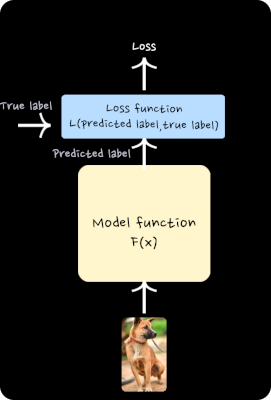




Any neural net model is made up of two key functions
- **a model function** the converts input to an output -  the model's prediction. For example, a model may convert the image of a dog to a single number 1 or 0. A model's function is composed of tweakable numbers or parameters.
- **a loss function** that takes the model's prediction and compares it with the ground truth that humans have labeled. The loss function outputs a single number, that captures how far off the model's prediction is from the ground truth label.

If the model function is F(x) where x is the input image , then the model output
  - F(x) = predicted label.
  - The model function is made up tweakable numbers or parameters.
  - The input x to the model function is the images used as training data

The loss is a function of both the predicted and ground truth labels
- Loss(predicted label, ground truth label).

That is the loss function is
- Loss(F(x), ground truth label).


The output of the loss function is a single number. The goal of training is reduce this value.

So it comes down to, what do tweak in the loss function to reduce the loss?
 - The ground truth label is a constant.
 - So the only way to reduce loss is through F(x). Clearly, we dont want to tweak the input to the function itself. Therefore, the only way to reduce loss is to tweak the model parameters.

That is exactly what we do. We use the loss function output to tweak the model parameters and reduce the prediction error. Gradients help us tweak each model parameter to reduce the prediction error.

The learning procedure for any neural net model can be approximated by a simple procedure without using Calculus

- first send an input (x) through the model.
- then send the model output to the loss function and  compute model error or loss (E1). This is a single number
- Bump up the value of a model parameter by a value 'h'.
- Send the **same input again** through model and loss function and compute error E2). *Note unlike the previous case of the single variable function where we tweak the input variable, it is the model parameter that is incremented. The input to the function is unchanged.*
- Find the rate of chage of error (or gradient) - (E2 - E1)/h
- Now simply subtract a small amount of this value from the parameter.

Repeat the steps above for each parameter and for each training input.

Note in the real world, we do this efficiently using Calculus. The procedure above is only an approximation to develop an intuition of how models learn. We will examining how it is actually performed in a future notebook

Neural nets are complex functions made up millions or even billions of tweakable numbers or parameters.

We computed gradients to nudge a point down the curve of a function of a single variable (tweakable number) above.  Lets apply the same procedure to a function of three variables, to convince ourselves this approach will work for a model with any number of parameters


##### Lets compute gradients for a function with three **variables (dials)**

In [ ]:
a = 2
b = -3
c = 10
value = a * b + c
print("function output:",value)

function output: 4


##### Our objective, as before, is to figure out how to tweak these variables so that the output of the function increases *(or decreases which is the one  of interest to us in our loss function use case - we want to reduce the error or loss)*

##### To figure this out lets start by examining how these variables individually affect the function output

##### We are first going to change these dials individually by a fixed value **h**

In [ ]:
h = .1 #constant value used to increment the value of each variable

###### Lets change **variable a** first and see how the function responds

In [ ]:
d1 = a*b+c
print("input before:",a, "  Input after incrementing:",a+h)
a = a + h
d2 = a*b + c
print("Output before:",d1, "  Output after incrementing:",d2)

input before: 2   Input after incrementing: 2.1
Output before: 4   Output after incrementing: 3.6999999999999993


*When we **changed variable a** by adding a tiny amount **h**, the function output went **down** a little. So **increasing variable a decreases** the output*

In [ ]:
GradA = (d2-d1)/h
print("Gradient at point A:",GradA)

Gradient at point A: -3.000000000000007


*This value captures the **rate of change** of function output when we changed the value of **variable a**. We will use it below*

###### Lets change **variable b** and see how the function responds

In [ ]:
d1 = a*b+c
print("input before:",b, "  Input after incrementing:",b+h)
b = b + h
d2 = a*b + c
print("Output before:",d1, "  Output after incrementing:",d2)

input before: -3   Input after incrementing: -2.9
Output before: 3.6999999999999993   Output after incrementing: 3.91


*When we **changed variable b** by adding a tiny amount **h**, the function output went **up** a little. So **increasing variable b increases** the output*

In [ ]:
GradB = (d2-d1)/h
print("Gradient at point B:",GradB)

Gradient at point B: 2.1000000000000085


*This value captures the **rate of change** of function output when we changed the value of **variable b**. We will use it below*

###### Lets change **variable c** and see how the function responds

In [ ]:
d1 = a*b+c
print("input before:",c, "  Input after incrementing:",c+h)
c = c + h
d2 = a*b + c
print("Output before:",d1, "  Output after incrementing:",d2)

input before: 10   Input after incrementing: 10.1
Output before: 3.91   Output after incrementing: 4.01


*When we **changed variable c** by adding a tiny amount **h**, the function output went **up** by same amount. So **increasing variable c increases** the output*

In [ ]:
GradC = (d2-d1)/h
print("Gradient at point C:",GradC)

Gradient at point C: 0.9999999999999964


*This value captures the **rate of change** of function output when we changed the value of **variable c**. We will use it below*




---


##### **Finding so far:** When we **increased two dials (b and c)** the output went **up**, whereas when we **increased  dial a** the output went **down**.

How can we know ***which direction to turn the dials*** so the function output ***increases*** (or decreases) ?

The rate of change of the function we calculated above ***(grada,gradb,gradc)*** with respect to each variable can be used for this. It tells which direction to tweak a dial.




---




##### We are now going to **change** these dials individually **adding** by a small fraction of the gradients computed above



In [ ]:
lr = .01 #this is the fraction of the gradients we are going to take

###### Lets add a fraction of the gradient **GradA** to  **variable a**  and see how the function responds

In [ ]:
a = 2
b = -3
c = 10
lr = .01
d1 = a*b + c
print("Gradient at point A:",GradA)
print(f"Original value of a: {a};  Value of a after adding a fraction of the gradient to it: {a+lr*GradA}")
a = a + lr*GradA #We increase "a" by a small fraction of the gradient
d2 = a*b + c
print("Output before:",d1, "  Output after adding gradient:",d2)

Gradient at point A: -3.000000000000007
Original value of a: 2;  Value of a after adding a fraction of the gradient to it: 1.97
Output before: 4   Output after adding gradient: 4.09


###### The output goes **up** when we changed **dial a** by adding a small fraction of the gradient **GradA**. Note, the output when **down** before when we **changed a** by adding a small amount **h**. The reason it goes up now when we change it by a small fraction of the gradient is, when we are adding a fraction of the gradient to **a**, we are **effectively decreasing the value of a**. This is because the gradient is **negative**
See the value of **a** before and after adding the *fraction of the gradient* - it goes down from 2 to 1.97 while the output goes up from 4 to 4.09

###### Lets add a fraction of the gradient **GradB** to  **variable b**  and see how the function responds

In [ ]:
a = 2
b = -3
c = 10
lr = .01
d1 = a*b + c
print("Gradient at point B:",GradB)
print(f"Original value of b: {b};  Value of a after adding a fraction of the gradient to it: {b+lr*GradB}")
b = b + lr*GradB
d2 = a*b + c
print("Output before:",d1, "  Output after adding gradient:",d2)

Gradient at point B: 2.1000000000000085
Original value of b: -3;  Value of a after adding a fraction of the gradient to it: -2.979
Output before: 4   Output after adding gradient: 4.042


###### *The output goes **up** when we change **dial b** by adding a small fraction of the gradient **GradB**.*

###### Lets add a fraction of the gradient **GradC** to  **variable c**  and see how the function responds

In [ ]:
a = 2
b = -3
c = 10
lr = .01
d1 = a*b + c
print("Gradient at point C:",GradC)
print(f"Original value of c: {c};  Value of a after adding a fraction of the gradient to it: {c+lr*GradC}")
c = c + lr*GradC
d2 = a*b + c
print("Output before:",d1, "  Output after adding gradient:",d2)

Gradient at point C: 0.9999999999999964
Original value of c: 10;  Value of a after adding a fraction of the gradient to it: 10.01
Output before: 4   Output after adding gradient: 4.01


###### *The output goes **up** when we change **dial c** by adding a small fraction of the gradient **GradC**.*




---


##### **Finding so far:** The function output **increased** when we **individually changed** each variable by adding a **fraction of the gradient** with respect to that variable.

Also note the three tweakable numbers a,b,c moved from (2,-3,10) to (1.97,-2.979,10.01). Even though we tweaked each one of them individually, the cumulative effect of this individual tweaking is a movement in three dimensional space. The direction of this vector is the direction that gradient captures, which in this case is the **directon of steepest ascent**


---



##### Lets examine function output if we **change** these dials individually by **subtracting** a small fraction of the gradients computed above

###### So lets subtract a fraction of the gradient **GradA** from  **variable a**  and see how the function responds

In [ ]:
a = 2
b = -3
c = 10
lr = .01
d1 = a*b + c
print("Gradient at point A:",GradA)
print(f"Original value of a: {a};  Value of a after adding a fraction of the gradient to it: {a-lr*GradA}")
a = a - lr*GradA #We increase "a" by a small fraction of the gradient
d2 = a*b + c
print("Output before:",d1, "  Output after adding gradient:",d2)

Gradient at point A: -3.000000000000007
Original value of a: 2;  Value of a after adding a fraction of the gradient to it: 2.0300000000000002
Output before: 4   Output after adding gradient: 3.9099999999999993


###### *The output goes **down** when we **change dial a** by subtracting a small fraction of the gradient **GradA**.*

###### Lets subtract a fraction of the gradient **GradB** from  **variable b**  and see how the function responds

In [ ]:
a = 2
b = -3
c = 10
lr = .01
d1 = a*b + c
print("Gradient at point B:",GradB)
print(f"Original value of b: {b};  Value of a after adding a fraction of the gradient to it: {b-lr*GradB}")
b = b - lr*GradB
d2 = a*b + c
print("Output before:",d1, "  Output after adding gradient:",d2)

Gradient at point B: 2.1000000000000085
Original value of b: -3;  Value of a after adding a fraction of the gradient to it: -3.021
Output before: 4   Output after adding gradient: 3.958


###### *The output goes **down** when we **change dial b** by subtracting a small fraction of the gradient **GradB**.*

###### Lets subtract a fraction of the gradient **GradC** to  **variable c**  and see how the function responds

In [ ]:
a = 2
b = -3
c = 10
lr = .01
d1 = a*b + c
print("Gradient at point C:",GradC)
print(f"Original value of c: {c};  Value of a after adding a fraction of the gradient to it: {c-lr*GradC}")
c = c - lr*GradC
d2 = a*b + c
print("Output before:",d1, "  Output after adding gradient:",d2)

Gradient at point C: 0.9999999999999964
Original value of c: 10;  Value of a after adding a fraction of the gradient to it: 9.99
Output before: 4   Output after adding gradient: 3.99


###### *The output goes **down** when we **change dial c** by subtracting a small fraction of the gradient **GradC**.*



---


##### **Finding so far:** The function output **decreased** when we **individually changed** each variable by subtracting a **fraction of the gradient** with respect to that variable

Also note the three tweakable numbers a,b,c moved from (2,-3,10) to (2.03,-3.021,9.99). Even though we tweaked each one of them individually, the cumulative effect of this individual tweaking is a movement in three dimensional space. The direction of this vector is the direction that gradient captures, which in this case is the **directon of steepest descent**



---






---



##### **Final Summary:** If we want to know which direction to tweak all the variables (dials) of a function to **increase** the output of a function, we just need to **add to each variable**, **the gradient** (or a fraction of it) of the function **with respect to that variable**.

##### Conversely, to **decrease** the output of a function, we just need to **subtract** from  each variable, the **gradient** (or a fraction of it) of the function **with respect to that variable.**

##### The gradient of a variable has two pieces of information to increase (or decrease) a function's output. It contains
- the direction to tweak a variable, and
- how much to tweak a variable.





---

The above argument applies no matter how many dials a function has, or how complex the function is. Most neural nets have multiple layers of parameters embedded in a complex expression. As an approximation of such a complex expression, in the example below, the output function depends
- directly on some dials
- and also another function which in turn depends on few other dials that are not directly present in the output function.

##### The observations we made earlier still applies.

In [ ]:
h = .1
a = 1
b = -1
c = -2
d = 3
e = -2
f = d*e*c
d1 = a*b*f # d is only used indirectly through f in the output function
print("input before:",d, "  Input after incrementing:",d+h)
d = d + h
f = d*e*c
d2 = a*b*f
print("Output before:",d1, "  Output after incrementing",d2)

input before: 3   Input after incrementing: 3.1
Output before: -12   Output after incrementing -12.4


In [ ]:
GradD = (d2-d1)/h
GradD

-4.0000000000000036

In [ ]:
h = .1
a = 1
b = -1
c = -2
d = 3
e = -2
lr = .01
f = d*e*c
d1 = a*b*f
#print(d,d + lr*GradD)
d = d + lr*GradD
f = d*e*c
d2 = a*b*f
print("Output before:",d1, "  Output after adding gradient:",d2)

Output before: -12   Output after adding gradient: -11.84


In [ ]:
h = .1
a = 1
b = -1
c = -2
d = 3
e = -2
lr = .01
f = d*e*c
d1 = a*b*f
#print(d,d - lr*GradD)
d = d - lr*GradD
f = d*e*c
d2 = a*b*f
print("Output before:",d1, "  Output after subtracting gradient:",d2)

Output before: -12   Output after subtracting gradient: -12.16


#### Key notes
- In the case of the simple functions examined above, closed-form solutions exist for finding the minimum. However, neural networks represent complex functions for which no closed-form solutions are available to determine the minima. In these scenarios, it's necessary to compute gradients and update model parameters accordingly
- As previously mentioned, the gradient computation in this notebook is an approximation. In practice, gradient computation is performed by calculating the derivative of the loss function with respect to each parameter. This calculation is efficiently executed using the backpropagation algorithm.
- Since the gradient was computed with respect to each parameter individually, the computed gradient was a scalar, with its sign indicating the direction. However, when gradients are computed using derivatives, they form a vector that represents both the magnitude and direction of steepest ascent (or descent).
- We update each variable with only a small fraction of the gradient, determined by the learning rate. This approach is necessary because the computed gradient can be large, and directly updating the model parameters with this value might cause the loss to potentially overshoot, jumping past a minimum.
- In practice, the fraction of the gradient used to update a parameter can vary depending on the parameter and the optimization algorithm being used.
- It is important to note that in general, a loss function is a function that takes a vector as input and outputs a single number. The gradient of the loss function is a vector comprised of partial derivatives with respect to each element in the input vector. The example below shows performing gradient computation using derivatives.

The loss function below is made up a function of three variables.


The content of this notebook is adapted from and inspired by [Andrej Karpathy's video on neural networks](https://youtu.be/VMj-3S1tku0)